In [141]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [118]:
data = pd.read_csv('Google_Stock_Price_Train.csv')
data = data.iloc[:, 1:2]

In [119]:
data.describe()

,Open
count,1258.000000
mean,533.709833
std,151.904442
min,279.120000
25%,404.115000
50%,537.470000
75%,654.922500
max,816.680000


In [120]:
data = data.values
data[:10]

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       [ 328.34],
       [ 322.04],
       [ 313.7 ],
       [ 310.59],
       [ 314.43],
       [ 311.96],
       [ 314.81]])

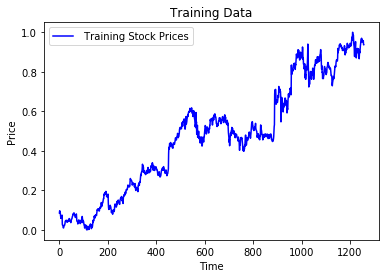

In [153]:
plt.plot(data, color='blue', label=" Training Stock Prices")
plt.title("Training Data")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [123]:
data[:10]

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       [ 0.09156187],
       [ 0.07984225],
       [ 0.0643277 ],
       [ 0.0585423 ],
       [ 0.06568569],
       [ 0.06109085],
       [ 0.06639259]])

In [124]:
X_train = data[:-1]
y_train = data[1:]

In [125]:
print ("Training Input", X_train[:5])
print ("Training Input Shape",X_train.shape)
print ("\n")
print ("Training Output", y_train[:5])
print ("Training Output Shape", y_train.shape)

Training Input [[ 0.08581368]
 [ 0.09701243]
 [ 0.09433366]
 [ 0.09156187]
 [ 0.07984225]]
Training Input Shape (1257, 1)


Training Output [[ 0.09701243]
 [ 0.09433366]
 [ 0.09156187]
 [ 0.07984225]
 [ 0.0643277 ]]
Training Output Shape (1257, 1)


In [126]:
X_train = np.reshape(X_train, (1257, 1, 1))

In [127]:
X_train[:5]

array([[[ 0.08581368]],

       [[ 0.09701243]],

       [[ 0.09433366]],

       [[ 0.09156187]],

       [[ 0.07984225]]])

In [128]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [129]:
model = Sequential()
model.add(LSTM(units = 4, activation='sigmoid', input_shape=[None, 1]))
model.add(Dense(units = 1))

In [130]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [131]:
model.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
1257/1257 [==============================] - 1s - loss: 0.2167      
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 0.1569     

In [143]:
test_csv = pd.read_csv('Google_Stock_Price_Test.csv')
test = test_csv.iloc[:, 1:2].values

In [144]:
test[:10]

array([[ 778.81],
       [ 788.36],
       [ 786.08],
       [ 795.26],
       [ 806.4 ],
       [ 807.86],
       [ 805.  ],
       [ 807.14],
       [ 807.48],
       [ 807.08]])

In [145]:
X_test = test
X_test = scaler.transform(X_test)
X_test.shape

(20, 1)

In [146]:
X_test = np.reshape(X_test, (20, 1, 1))

In [147]:
preds = model.predict(X_test)

In [148]:
preds

array([[ 0.92670941],
       [ 0.94349885],
       [ 0.93950558],
       [ 0.95557237],
       [ 0.97502863],
       [ 0.9775753 ],
       [ 0.97258592],
       [ 0.97631943],
       [ 0.9769125 ],
       [ 0.97621489],
       [ 0.97399938],
       [ 0.97279525],
       [ 0.97591829],
       [ 0.97651136],
       [ 1.00272131],
       [ 1.01544023],
       [ 1.02964854],
       [ 1.02427328],
       [ 0.98942602],
       [ 0.95836949]], dtype=float32)

In [149]:
preds = scaler.inverse_transform(preds)

In [150]:
preds

array([[ 777.28186035],
       [ 786.30718994],
       [ 784.1605835 ],
       [ 792.79748535],
       [ 803.25634766],
       [ 804.62536621],
       [ 801.9432373 ],
       [ 803.95025635],
       [ 804.26904297],
       [ 803.89404297],
       [ 802.70306396],
       [ 802.05578613],
       [ 803.73461914],
       [ 804.05340576],
       [ 818.14282227],
       [ 824.9800415 ],
       [ 832.61785889],
       [ 829.72833252],
       [ 810.99584961],
       [ 794.30108643]], dtype=float32)

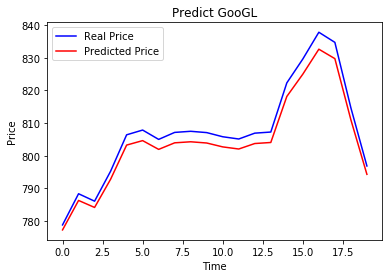

In [151]:
plt.plot(test, color='blue', label="Real Price")
plt.plot(preds, color='red', label="Predicted Price")
plt.title("Predict GooGL")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()